# Importing code from the previous notebooks as module

In [1]:
# instead of copy-pasting the micrograd code everytime
# let's use the below code to pull the code in the form of a module

In [2]:
!git clone https://github.com/mratanusarkar/Learning-DeepLearning.git &> /dev/null
%cd /content/Learning-DeepLearning/Neural\ Networks\ -\ Zero\ to\ Hero
!python setup.py install &> /dev/null

/content/Learning-DeepLearning/Neural Networks - Zero to Hero


In [3]:
from micrograd.engine import Value
from micrograd.visualize import draw_dot

In [4]:
import random

# Neural Networks Class

In [5]:
# okay, so now that we have tools in our hand to build out complicated mathematical expressions 
# we can now focus on starting to build out neural nets
# neural nets are nothing but a specific class of mathematical expressions

In [6]:
# let's build a multi-layer perceptron
# we have already built a neuron before, 
# but let's build a class this time that matches the design in torch api

In [7]:
class NoobNeuron:

    def __init__(self, nin) -> None:
        """
        Constructs a neuron that has `nin` inputs and assigns random weights & bias to the neuron

        Parameters
        ----------
            nin : int
                number of inputs entering into the neuron
        """

        self.w = [Value(random.uniform(-1,1)) for _ in range(nin)]
        self.b = Value(random.uniform(-1,1))

    def __call__(self, x):
        """
        Takes in a list of all `nin` input `x values`, 
        Computes the body by doing `sum(w.x + b)` and 
        Passes the result through a non-linear activation function to return output

        `out = f(sum(w.x + b))`

        Parameters
        ----------
            x : list(float)
                the input values or the x
        """

        sum = Value(0.0, label='sum')
        for i, (xi, wi) in enumerate(zip(x, self.w)):
            # inputs
            x = Value(xi, label=f'x{i}')

            # weights
            w = wi;         w.label=f'w{i}'

            # dendrites of the neuron (inputs weighted)
            den = x * w;    den.label=f'den{i}'

            # sum of dendrite signals inside cell body
            sum = sum + den;

        # bias of the neuron
        b = self.b;     b.label='b'

        # bias gets added inside the body
        body = sum + b;     body.label='body'

        # the net signal passes through a non-linear activation function
        out = body.tanh()
        out.label='out'

        return out

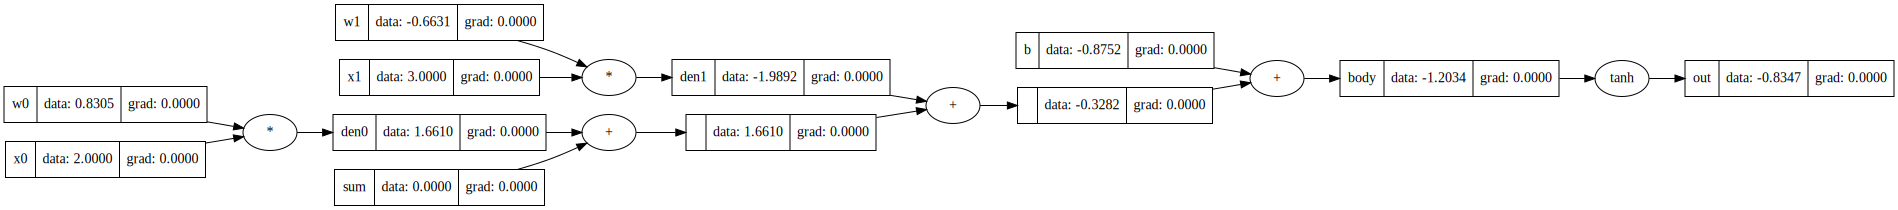

In [8]:
x = [2.0, 3.0]
n = NoobNeuron(2)
n = n(x)
draw_dot(n)

In [9]:
class Neuron:

    def __init__(self, nin) -> None:
        """
        Constructs a neuron that has `nin` inputs and assigns random weights & bias to the neuron

        Parameters
        ----------
            nin : int
                number of inputs entering into the neuron
        """

        self.w = [Value(random.uniform(-1,1)) for _ in range(nin)]
        self.b = Value(random.uniform(-1,1))

    def __call__(self, x):
        """
        Takes in a list of all `nin` input `x values`, 
        Computes the body by doing `sum(w.x + b)` and 
        Passes the result through a non-linear activation function to return output

        `out = f(sum(w.x + b))`

        Parameters
        ----------
            x : list(float)
                the input values or the x
        """

        # body = sum(weights.input_xs + bias)
        body = sum((wi * xi for wi, xi in zip(self.w, x)), self.b)

        # the net signal passes through a non-linear activation function
        out = body.tanh()

        return out

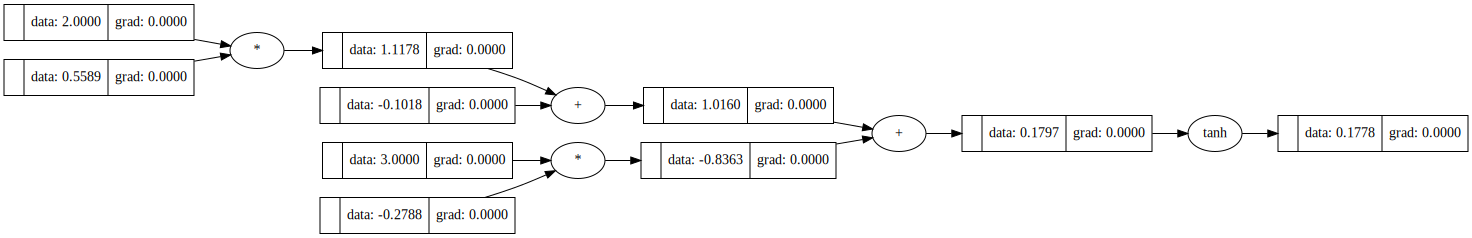

In [10]:
x = [2.0, 3.0]
n = Neuron(2)
n = n(x)
draw_dot(n)